AI-generated notebook with human supervision
***Important:*** This notebook was AI-generated with human supervision and has not been fully verified. Use caution when interpreting the code or results.

# Calcium imaging in SMA and M1 of macaques
This notebook explores a calcium imaging dataset from the DANDI Archive, specifically Dandiset [001174](https://dandiarchive.org/dandiset/001174).
The dataset contains calcium imaging data from the supplementary motor (SMA) and primary motor areas (M1) of four rhesus macaques during rest and arm-reaching tasks.

The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders.
Calcium imaging and miniature microscopes allow the study of multiple genetically identified neurons with excellent spatial resolution.
This dataset demonstrates the value of in vivo calcium imaging for studying patterns of activity in groups of corticofugal neurons in SMA and M1.

Key metadata:
- Name: Calcium imaging in SMA and M1 of macaques
- Description: The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders.
- Number of subjects: 4
- Keywords: One-photon calcium imaging, non-human primates, microendoscope, reaching task, neuronal coactivation, calcium sensors, GCaMP, GRIN lens

Before using this notebook:
- Install the necessary packages: `pip install lindi pynwb matplotlib seaborn`

In [1]:
# Use the DANDI API to list all of the assets in the Dandiset
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001174")
assets = list(dandiset.get_assets())
print(f"Found {len(assets)} assets in the Dandiset.")

Found 45 assets in the Dandiset.


## Dataset Structure Exploration
Now let's explore the structure of the dataset using `pynwb` and `lindi`.

In [2]:
import pynwb
import lindi
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Load the NWB file
# To load a different NWB file, replace the asset URL with the URL of the desired file.
# A full list of files can be found in this notebook's output above, or on the DANDI Archive web interface
# for this Dandiset: https://dandiarchive.org/dandiset/001174
f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/001174/assets/de07db56-e7f3-4809-9972-755c51598e8d/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

## Accessing and Visualizing Sample Data
We will now access and visualize some sample data from the NWB file.

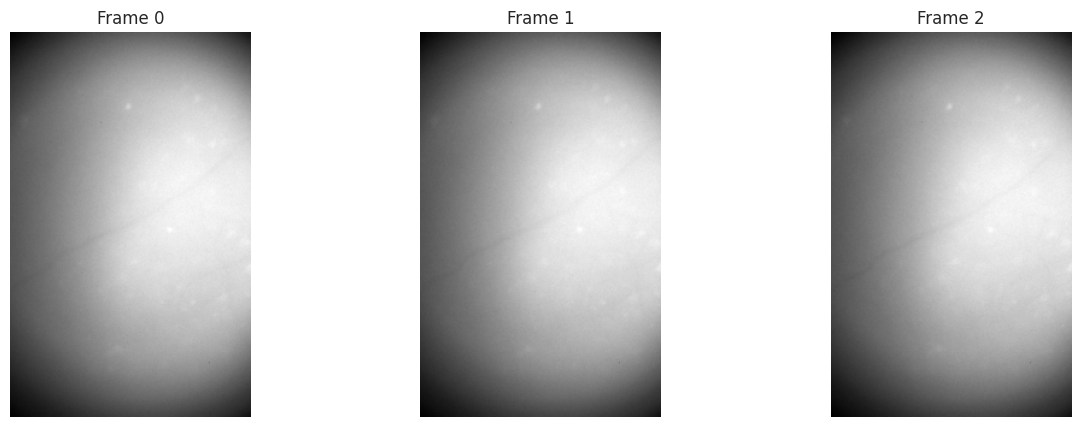

In [3]:
# Access the OnePhotonSeries data
OnePhotonSeries = nwb.acquisition["OnePhotonSeries"]
data = OnePhotonSeries.data

# Plot the first 3 frames
num_frames = 3
fig, axes = plt.subplots(1, num_frames, figsize=(15, 5))
for i in range(num_frames):
    axes[i].imshow(data[i, :, :], cmap='gray')
    axes[i].set_title(f'Frame {i}')
    axes[i].axis('off')

plt.show()

The above plot shows the first 3 frames of the OnePhotonSeries data. Each frame represents a single timepoint in the calcium imaging recording.

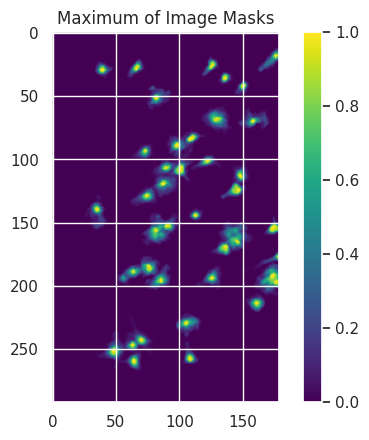

In [4]:
# Access the PlaneSegmentation data
PlaneSegmentation = nwb.processing["ophys"]["ImageSegmentation"]["PlaneSegmentation"]
image_mask = PlaneSegmentation["image_mask"].data

# Plot the maximum of all image masks
max_image_mask = np.max(image_mask[:], axis=0)
plt.imshow(max_image_mask, cmap='viridis')
plt.title('Maximum of Image Masks')
plt.colorbar()
plt.show()

The heatmap above represents the maximum intensity values of a set of image masks. The brighter areas indicate higher maximum values and likely represent the location of cells.

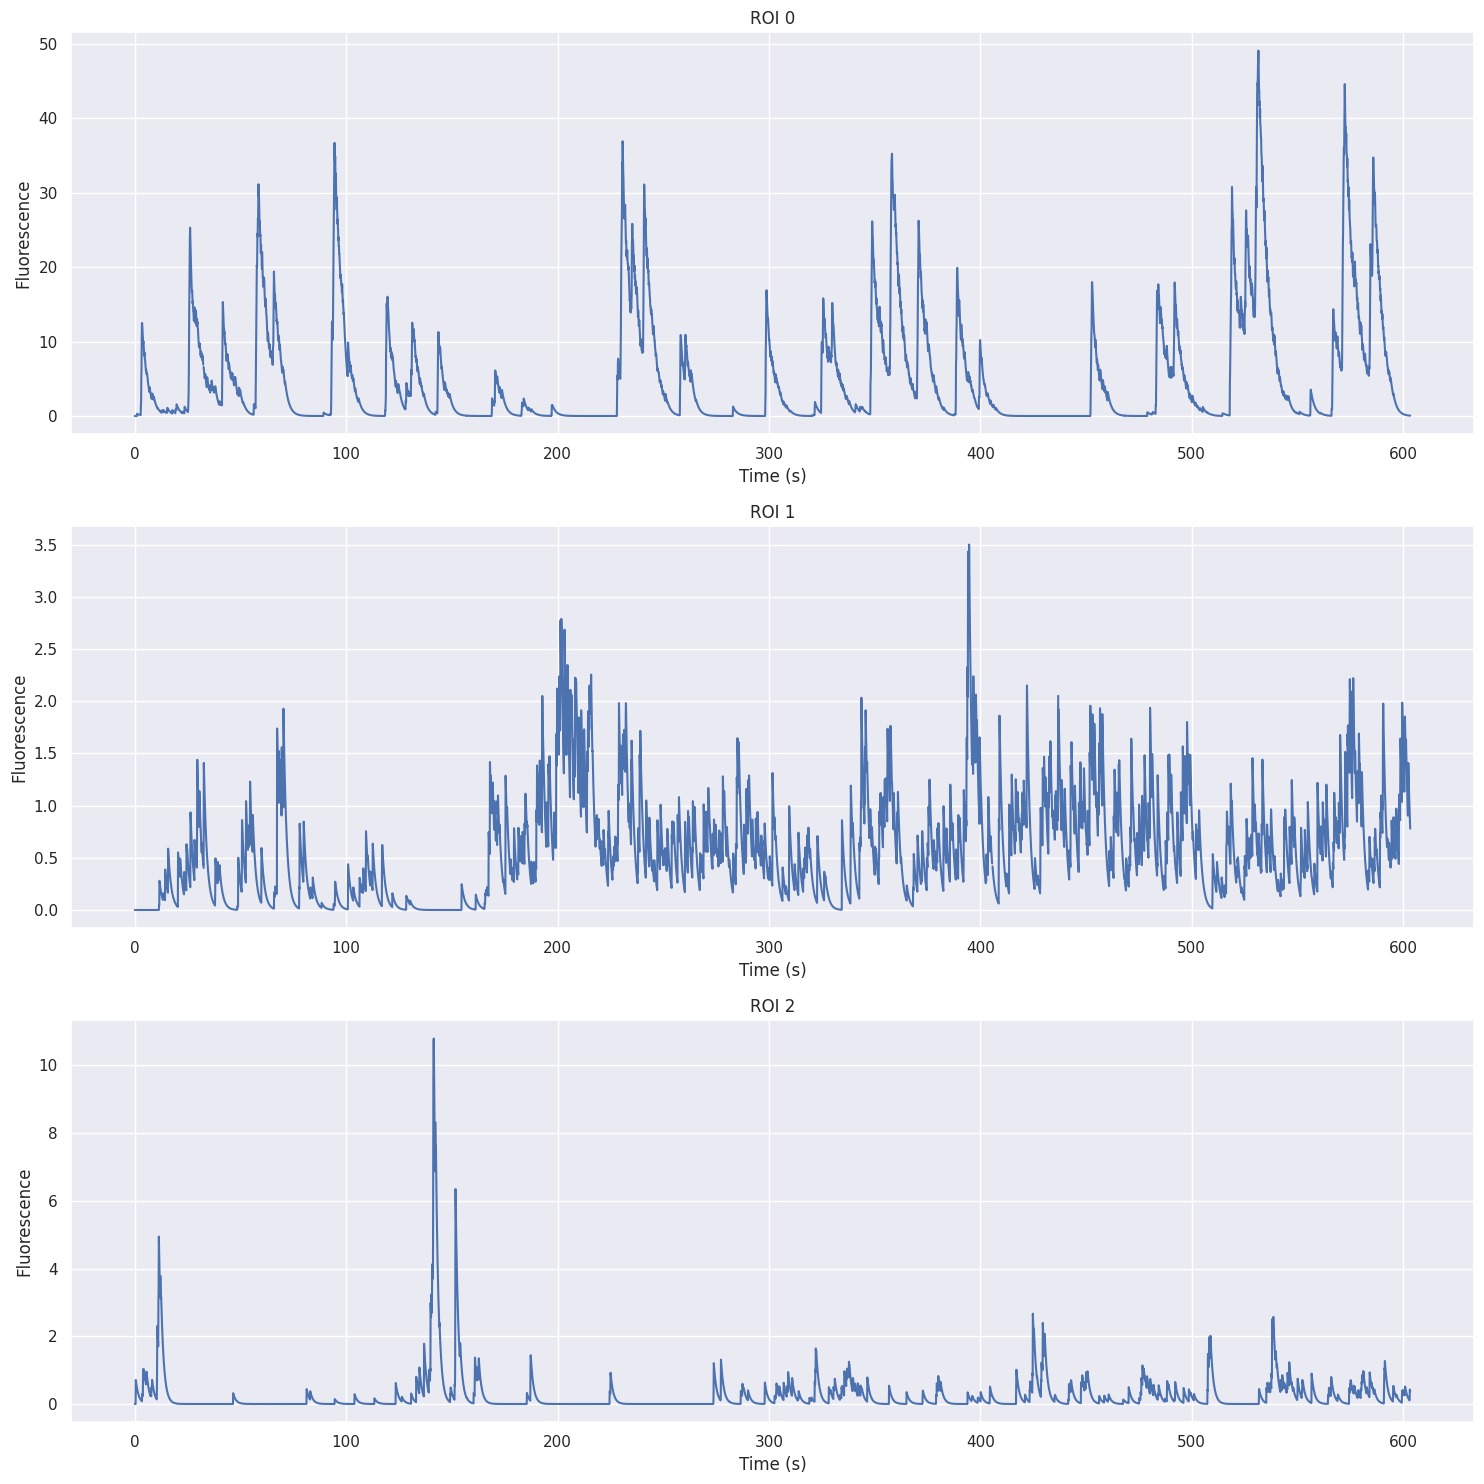

In [5]:
# Access the RoiResponseSeries data
RoiResponseSeries = nwb.processing["ophys"]["Fluorescence"]["RoiResponseSeries"]
data = RoiResponseSeries.data
rate = RoiResponseSeries.rate
num_rois = data.shape[1]

# Plot the activity of the first 3 ROIs over time
num_rois_to_plot = min(3, num_rois)  # Ensure we don't try to plot more ROIs than available
time = np.arange(0, data.shape[0] / rate, 1 / rate)
fig, axes = plt.subplots(num_rois_to_plot, 1, figsize=(15, 5 * num_rois_to_plot))

for i in range(num_rois_to_plot):
    if num_rois_to_plot == 1:
      ax = axes
    else:
      ax = axes[i]
    ax.plot(time, data[:, i])
    ax.set_title(f'ROI {i}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Fluorescence')

plt.tight_layout()
plt.show()

The plots above show the fluorescence activity over time for the first 3 ROIs. Different ROIs may exhibit different patterns of activity, such as periodic peaks or continuous fluctuations.